In [1]:
import os
from seffnet.utils import get_boxplot
from seffnet.constants import RESOURCES

W1108 11:53:53.895952 139702509016896 __init__.py:690] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [9]:
path = os.path.join(RESOURCES, "robustness_analysis", "experiments_repeats")

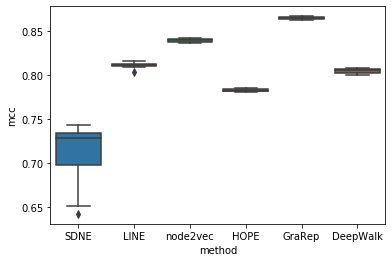

In [10]:
df, boxplot = get_boxplot(dir_path=path)

In [11]:
df.groupby('method').mean()

,mcc
method,
DeepWalk,0.804579
GraRep,0.864827
HOPE,0.782789
LINE,0.810874
SDNE,0.710338
node2vec,0.839377


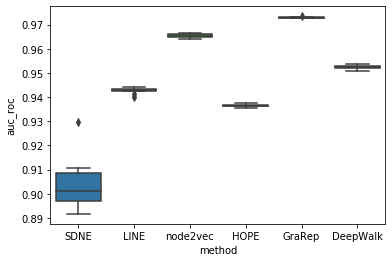

In [15]:
df, boxplot = get_boxplot(dir_path=path, metric='auc_roc')

In [16]:
df.groupby('method').mean()

,auc_roc
method,
DeepWalk,0.952446
GraRep,0.972873
HOPE,0.936511
LINE,0.942648
SDNE,0.903895
node2vec,0.965451


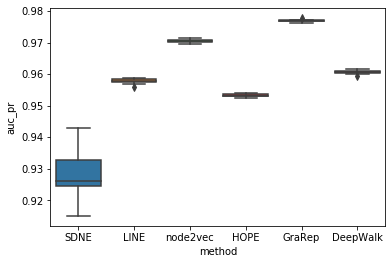

In [17]:
df, boxplot = get_boxplot(dir_path=path, metric='auc_pr')

In [18]:
df.groupby('method').mean()

,auc_pr
method,
DeepWalk,0.960687
GraRep,0.976898
HOPE,0.953305
LINE,0.957827
SDNE,0.928330
node2vec,0.970561
